In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [152]:
report_df = pd.read_csv('../datasets/other/world_happiness_report.csv')
report_df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [153]:
report_df.describe()

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000,1838.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501,0.483999
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875,0.193071
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660,0.332549
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671,0.467140
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894,0.618846
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590,0.993604


In [154]:
renamed_columns = {
    'Country Name' : 'country',
    'Regional Indicator' : 'region',
    'Year' : 'year',
    'Life Ladder' : 'life_ladder',
    'Log GDP Per Capita' : 'gdp_per_capita',
    'Social Support' : 'social_support',
    'Healthy Life Expectancy At Birth' : 'healthy_life',
    'Freedom To Make Life Choices' : 'free_to_choose',
    'Generosity' : 'generosity',
    'Perceptions Of Corruption' : 'corruption',
    'Positive Affect' : 'pos_affect',
    'Negative Affect' : 'neg_affect',
    'Confidence In National Government' : 'gov_confidence'
}

report_df.rename(columns=renamed_columns, inplace=True)
report_df.head()

,country,region,year,life_ladder,gdp_per_capita,social_support,healthy_life,free_to_choose,generosity,corruption,pos_affect,neg_affect,gov_confidence
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


<AxesSubplot:xlabel='Regions'>

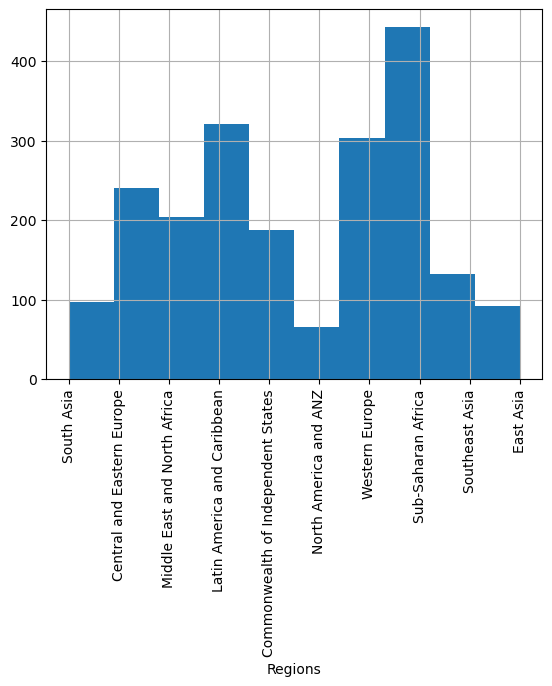

In [155]:
ax = report_df.region.hist()
ax.set_xlabel('Regions')
plt.xticks(rotation=90)
ax

In [156]:
x_train, x_test, y_train, y_test = train_test_split( \
        report_df.drop(columns=['neg_affect', 'pos_affect']),      \
        report_df.pos_affect,                        \
        test_size=0.3,                               \
        random_state=123)

In [157]:
x_train.head()

,country,region,year,life_ladder,gdp_per_capita,social_support,healthy_life,free_to_choose,generosity,corruption,gov_confidence
210,Bolivia,Latin America and Caribbean,2018,5.915734,9.043848,0.827159,63.150002,0.863247,-0.094124,0.786045,0.399588
489,Cyprus,Western Europe,2021,6.269202,10.638297,0.855357,72.800003,0.717639,-0.036411,0.876456,0.321940
297,Cambodia,Southeast Asia,2010,4.141072,7.903593,0.697164,59.000000,0.940131,0.348260,0.895714,0.895581
1371,Nepal,South Asia,2014,4.975015,8.055885,0.785883,60.139999,0.711878,0.110994,0.840686,0.588196
1642,Rwanda,Sub-Saharan Africa,2014,3.595678,7.459077,0.748304,58.299999,0.894025,-0.022424,0.078000,NaN


In [158]:
num_features = ['year', 'life_ladder', 'gdp_per_capita', \
                'social_support', 'healthy_life', 'free_to_choose', \
                'generosity', 'corruption', 'gov_confidence']

In [159]:
num_features_to_impute_info = x_train[num_features] \
    .isnull() \
    .mean() \
    .loc[lambda x : x < 0.06] \
    .sort_values(ascending=False)

num_features_to_impute_info

corruption        0.045484
generosity        0.037037
healthy_life      0.027290
free_to_choose    0.013645
gdp_per_capita    0.010396
social_support    0.004548
year              0.000000
life_ladder       0.000000
dtype: float64

In [160]:
num_features_to_impute = num_features_to_impute_info.index.values

In [161]:
imputed_features = []

median_imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

median_imputer.fit(x_train[num_features_to_impute])

num_features_imputed = median_imputer.transform(x_train[num_features_to_impute])
test_num_features_imputed = median_imputer.transform(x_test[num_features_to_impute])

imputed_train_df = pd.DataFrame(columns=x_train.columns)
imputed_train_df[num_features_to_impute] = num_features_imputed.tolist()

imputed_test_df = pd.DataFrame(columns=x_train.columns)
imputed_test_df[num_features_to_impute] = test_num_features_imputed.tolist()

imputed_train_df.head()

,country,region,year,life_ladder,gdp_per_capita,social_support,healthy_life,free_to_choose,generosity,corruption,gov_confidence
0,NaN,NaN,2018.0,5.915734,9.043848,0.827159,63.150002,0.863247,-0.094124,0.786045,NaN
1,NaN,NaN,2021.0,6.269202,10.638297,0.855357,72.800003,0.717639,-0.036411,0.876456,NaN
2,NaN,NaN,2010.0,4.141072,7.903593,0.697164,59.000000,0.940131,0.348260,0.895714,NaN
3,NaN,NaN,2014.0,4.975015,8.055885,0.785883,60.139999,0.711878,0.110994,0.840686,NaN
4,NaN,NaN,2014.0,3.595678,7.459077,0.748304,58.299999,0.894025,-0.022424,0.078000,NaN


In [162]:
knn_imputer = KNNImputer(n_neighbors=2)

gov_confidence_df = pd.DataFrame(x_train.gov_confidence, columns=['gov_confidence'])
knn_imputer.fit_transform(gov_confidence_df)

gov_confidence_imputed = knn_imputer.transform(gov_confidence_df)
imputed_train_df.gov_confidence = gov_confidence_imputed

imputed_train_df.head()

,country,region,year,life_ladder,gdp_per_capita,social_support,healthy_life,free_to_choose,generosity,corruption,gov_confidence
0,NaN,NaN,2018.0,5.915734,9.043848,0.827159,63.150002,0.863247,-0.094124,0.786045,0.399588
1,NaN,NaN,2021.0,6.269202,10.638297,0.855357,72.800003,0.717639,-0.036411,0.876456,0.321940
2,NaN,NaN,2010.0,4.141072,7.903593,0.697164,59.000000,0.940131,0.348260,0.895714,0.895581
3,NaN,NaN,2014.0,4.975015,8.055885,0.785883,60.139999,0.711878,0.110994,0.840686,0.588196
4,NaN,NaN,2014.0,3.595678,7.459077,0.748304,58.299999,0.894025,-0.022424,0.078000,0.482347
